<a href="https://colab.research.google.com/github/AdriSaptaF/Tugas/blob/main/RawGraphAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Exploring the data Sales involves a step-by-step process:**

Made By Group 11

- Ahmad Taufiq H
- Yasmin Hafidah Alqanit
- Momin Diyar
- Adri Sapta F
- Muhammad Rayhan Nur
- Muhammad Akhlaq
- Iffa Ewanny

**Description Task**

1. Check and prepare data to clean and handling missing values and ensuring consistency.
2.Summaries the data with statistical analysis: Use descriptive statistics with aggregation function (i.e sum, count, average, min, max) for searching meaningful information such as: top product sales, total amount, average amount, etc
3.Use Statistical methods to identify significant correlation/comparative/distribution/trending between variables from the data
4.Visualize the data with charts and graphs to see patterns and relationships (min.3 graph)
5.Use related python library to handle all of tasks
6.Upload your source code with python extension file such as .py or .ipynb and file  .rawgraphs (if you visualized the data using rawgraphs)

**Objective**

- Conduct exploratory Data Analysis (EDA): Perform EDA to understand the  distribution and relationships between variables from the data

- Analyzing Sales Dataset is to identify salles patterns from order data that  resonate with consumers and propel them to purchase.

- Translate insights into actionable recommendations that optimize product  development, inform marketing strategies, and boost competitive edge.

In [121]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**1. Import Library And Load The Data**

In [122]:
#Use Related Python Libraries
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns

In [123]:
# Read The CSV File with semicolon separator
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/orderdataset - orderdataset.csv', sep=';')

# Save again the CSV file
df.to_csv('dataset.csv', index=False)


In [124]:
# Read file CSV
df = pd.read_csv('dataset.csv')

#show the early information
print("1. Info:")
print(df.info())

#check types for all columns
print("\n2. Types Of Table Atribut:")
print(df.dtypes)

# Show The Table Attributes
print("\n3. Table Attributs:\n")
print(df.columns)

# Show the 5 data from top
print("\n4. Head from Data:\n")
print(df.head())

1. Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49999 entries, 0 to 49998
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               49999 non-null  object 
 1   quantity               49999 non-null  int64  
 2   product_id             49999 non-null  object 
 3   price                  49999 non-null  int64  
 4   seller_id              49999 non-null  object 
 5   freight_value          49999 non-null  int64  
 6   customer_id            49999 non-null  object 
 7   order_status           49999 non-null  object 
 8   purchase_date          49999 non-null  object 
 9   payment_type           49999 non-null  object 
 10  product_category_name  49999 non-null  object 
 11  product_weight_gram    49980 non-null  float64
dtypes: float64(1), int64(3), object(8)
memory usage: 4.6+ MB
None

2. Types Of Table Atribut:
order_id                  object
quantity                  

**2. Check for missing values and ensure data consistency**

In [125]:
#change the NULL string with NaN
df.replace("", np.nan, inplace=True)

#Check The Missing Values from Column and show it
missing_values = df.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)

#Check Missing Values From Rows
rows_missing_values = df[df.isnull().any(axis=1)]
print("Row With Missing Value:\n", rows_missing_values)


Missing Values in Each Column:
 order_id                  0
quantity                  0
product_id                0
price                     0
seller_id                 0
freight_value             0
customer_id               0
order_status              0
purchase_date             0
payment_type              0
product_category_name     0
product_weight_gram      19
dtype: int64
Row With Missing Value:
                                order_id  quantity  \
1193   85f8ad45e067abd694b627859fa57453         1   
5624   eb855beb3ac99461f7a076b4c3652472         1   
6284   a2456e7f02197951664897a94c87242d         1   
6312   e3daea0200104991cb979c2fcc509ae7         1   
6433   6f497c40431d5fb0cfbd6c943dd29215         1   
6480   1521c6bb7b1028154c8c67cf80fa809f         1   
6499   415cfaaaa8cea49f934470548797fed1         2   
6500   415cfaaaa8cea49f934470548797fed1         1   
6555   101157d4fae1c9fb74a00a5dee265c25         1   
7046   c1424efcde3c9e9febd9e1761667789e         1   
8452   ddf1

**product_weight_gram has 19 missing value also after we check for each rows, these rows contain NaN values in the product_weight_gram column, indicating that the weight of the product was not recorded for these transactions.**

In [126]:
from scipy import stats

# Function to remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Handling missing values
df.fillna(df.median(numeric_only=True), inplace=True) #fill the missing values for each the numeric column with median
df['product_weight_gram'].fillna(df['product_weight_gram'].median(), inplace=True)

# Calculate the Z-scores for numeric columns
numeric_columns = df.select_dtypes(include=[np.number])
z_scores = np.abs(stats.zscore(numeric_columns))

# Set a threshold for Z-score
threshold = 3

# Get the indices of outliers
outliers = np.where(z_scores > threshold)

# Show the outlier data based on Z-score
outlier_data_zscore = df.iloc[outliers[0]]

Filling missing values with the median for numeric columns is a common practice for several reasons:

1. **Robustness to Outliers**

The median is the middle value of a sorted dataset and is not influenced by outliers as much as the mean. If there are extreme values (outliers) in the data, the median remains more stable. This makes it a reliable choice for filling missing values in datasets that may contain outliers.

2. **Handling Skewed Data**

For data that is not normally distributed or exhibits skewness, the median provides a more accurate representation of the center of the data compared to the mean. Using the median helps preserve the original distribution of the data.

3. **Simple and Effective**

Using the median is a straightforward and effective approach to dealing with missing values. It is easy to implement and generally yields reasonable results, especially when data cleansing and preprocessing are essential steps in data analysis.

**For example :**

In the context of the column "price" with the following data points: 100, 150, 200, 250, 300, and 10000, let's analyze why using the median to fill missing values is more appropriate than using the mean.

The mean is calculated by summing all values and dividing by the number of observations. For the given data, the mean is (100 + 150 + 200 + 250 + 300 + 10000) / 6 = 1675. This value is heavily influenced by the outlier, 10000.

On the other hand, the median represents the middle value when the data points are sorted in ascending order. In this case, the median of the dataset (100, 150, 200, 250, 300, 10000) is 225. Unlike the mean, the median is not skewed by extreme values such as outliers.

**Use IQR Function and Z-Score to Check and Remove The Outlier**

**We use Both Of them Method Because :**

**Data Distribution**: Use the IQR method when dealing with skewed or non-normally distributed data because it focuses on the range of the middle 50% of the data.

**Universal Application**: The Z-score method is advantageous for datasets where normality assumptions hold or when a standardized approach is preferred across multiple variables.

**Contextual Understanding**: Consider the context of the data and the specific requirements of our analysist when choosing between these methods. It may also be beneficial to use both methods for robust outlier detection and validation.

In [127]:
# Remove outliers for each numeric column using IQR method
data_no_outliers = df.copy()
for column in ['quantity', 'price', 'freight_value', 'product_weight_gram']:
    data_no_outliers = remove_outliers(data_no_outliers, column)

# Display summary statistics after handling outliers
summary_after = data_no_outliers[['quantity', 'price', 'freight_value', 'product_weight_gram']].describe()
print("Summary Statistics after Handling Outliers with IQR:\n", summary_after)

Summary Statistics after Handling Outliers with IQR:
        quantity         price  freight_value  product_weight_gram
count   37518.0  3.751800e+04   37518.000000         37518.000000
mean        1.0  2.606574e+06  104824.724132           906.909990
std         0.0  1.387089e+06   55148.147863           847.590523
min         1.0  2.000000e+05    9000.000000            50.000000
25%         1.0  1.411000e+06   57000.000000           258.000000
50%         1.0  2.610000e+06  105000.000000           600.000000
75%         1.0  3.806000e+06  153000.000000          1350.000000
max         1.0  5.000000e+06  200000.000000          4175.000000


From the results obtained after removing outliers using the IQR method:

**Quantity**: After removing outliers, the mean value of the 'quantity' column is 1. This indicates that after outlier removal, all remaining values are consistently 1.

**Price**: The average price after outlier removal is approximately 2.61 million units, with a standard deviation of about 1.39 million units. The range of price values has been adjusted after outlier removal, resulting in a more representative distribution of data.

**Freight Value**: Post outlier removal, freight values range from 9,000 to 200,000 units, with an average of approximately 104,820 units. This indicates that the distribution of shipping costs has become more consistent after removing outliers.

**Product Weight (gram)**: The average product weight after outlier removal is around 907 grams, with a standard deviation of about 848 grams. The range of product weights now spans from 50 to 4,175 grams after outlier removal.

In summary, using the IQR method to remove outliers has led to more stable and representative data distributions for each numeric column in the dataset. This is crucial to ensure that subsequent analyses or modeling efforts are based on reliable data that are not influenced by extreme values or outliers.

Text(0.5, 1.0, 'Boxplot of Numerical Columns (Before Handling Outliers)')

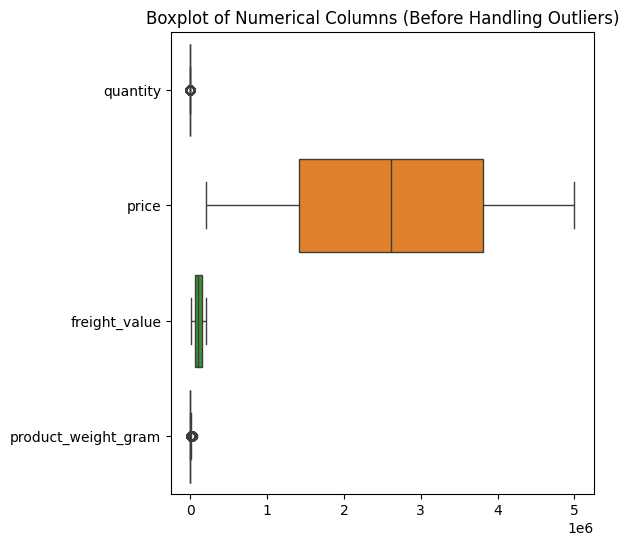

In [128]:
# Visualize all data before and after handling outliers
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(data=df[['quantity', 'price', 'freight_value', 'product_weight_gram']], orient='h')
plt.title('Boxplot of Numerical Columns (Before Handling Outliers)')

**There are some outlier from Quantity and Product_Weight_Gram**

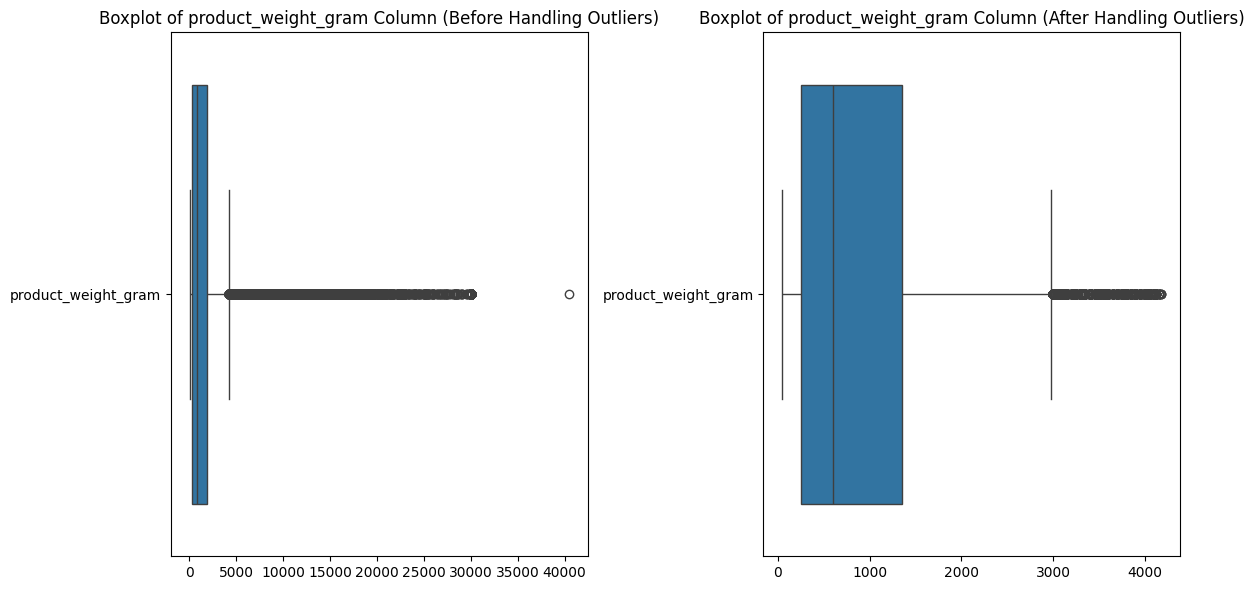

In [129]:
# Visualize specific data before and after handling outliers for product_weight_gram
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[['product_weight_gram']], orient='h')
plt.title('Boxplot of product_weight_gram Column (Before Handling Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers[['product_weight_gram']], orient='h')
plt.title('Boxplot of product_weight_gram Column (After Handling Outliers)')

plt.tight_layout()
plt.show()

**as a result before handling the outlier and after handling outlier from product_weight_gram column
the outlier still exist but less than before we handling outlier**

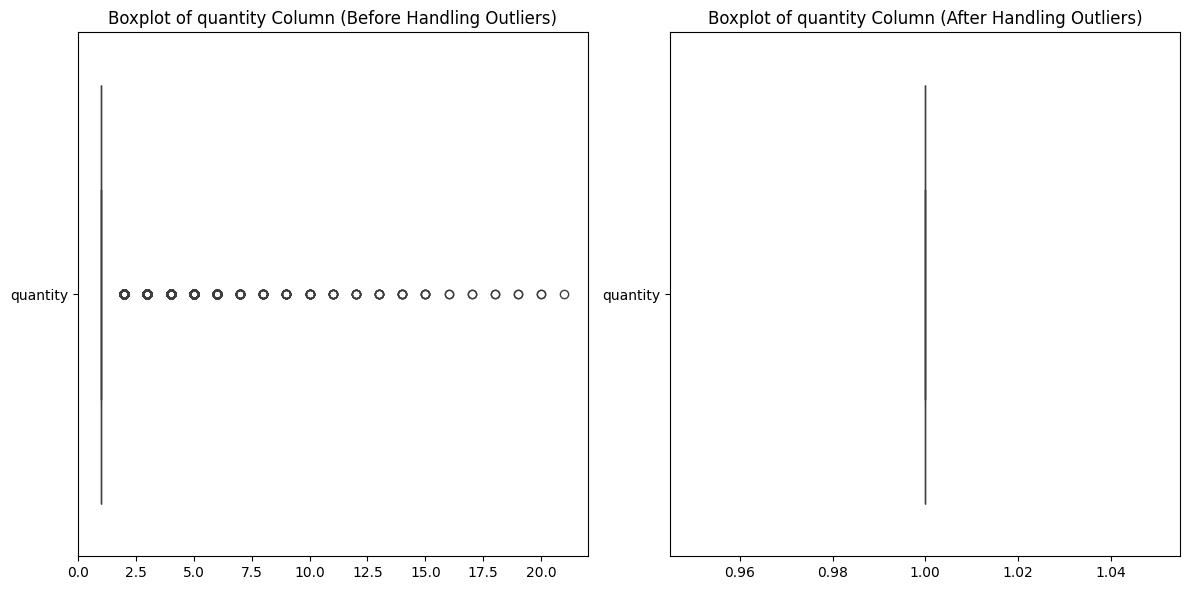

In [130]:
# Visualize specific data before and after handling outliers for quantity
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(data=df[['quantity']], orient='h')
plt.title('Boxplot of quantity Column (Before Handling Outliers)')

plt.subplot(1, 2, 2)
sns.boxplot(data=data_no_outliers[['quantity']], orient='h')
plt.title('Boxplot of quantity Column (After Handling Outliers)')

plt.tight_layout()
plt.show()

**and result from quantity before handling and after handling the outlier
from graph we found no more outlier in a dataset**

**3. Summarize Data with Statistical Analysist**

In [131]:
# Show Statistic Data For Each Column
print(df.describe())

#  Aggregate the data to search the important information
total_sales = df['price'].sum()
average_price = df['price'].mean()
top_product_sales = df.groupby('product_category_name')['quantity'].sum().sort_values(ascending=False)

print(f"\nTotal Sales: {total_sales}")
print(f"Average Price: {average_price}")
print(f"Top Product Sales:\n{top_product_sales}")

           quantity         price  freight_value  product_weight_gram
count  49999.000000  4.999900e+04   49999.000000         49999.000000
mean       1.197484  2.607784e+06  104521.390428          2201.298186
std        0.722262  1.388312e+06   55179.844962          3929.245088
min        1.000000  2.000000e+05    9000.000000            50.000000
25%        1.000000  1.410500e+06   57000.000000           300.000000
50%        1.000000  2.610000e+06  104000.000000           800.000000
75%        1.000000  3.810000e+06  152000.000000          1850.000000
max       21.000000  5.000000e+06  200000.000000         40425.000000

Total Sales: 130386588000
Average Price: 2607783.9156783135
Top Product Sales:
product_category_name
toys           7705
electronics    7537
automotive     7504
fashion        7486
beauty         7452
sports         7411
gadget         7393
utilities      7385
Name: quantity, dtype: int64


From the descriptive statistics and aggregation results:

**1. Descriptive Statistics:**

**Quantity**: The average quantity per order is approximately 1.2 units, with a minimum of 1 unit and a maximum of 21 units. The data has a standard deviation of about 0.72 units, indicating variability around the mean.

**Price**: The total sales amount is 130,386,588,000 units (currency units), with an average price of approximately 2,607,784 units per product. Prices range from 200,000 units to 5,000,000 units, with a standard deviation of about 1,388,312 units.

**Freight Value**: The average freight cost is around 104,521 units, ranging from 9,000 units to 200,000 units. The standard deviation is about 55,180 units.

**Product Weight (gram)**: The average product weight is approximately 2,202 grams, with weights ranging from 50 grams to 40,425 grams. There is significant variability in weights, reflected in a high standard deviation of about 3,930 grams.

**2. Aggregate Information:**

**Total Sales**: The sum of all prices indicates a total sales revenue of 130,386,588,000 units.

**Average Price**: The average price per product sold is 2,607,784 units.

**Top Product Sales**: The top-selling product categories based on total quantity sold are toys, electronics, automotive, fashion, beauty, sports, gadget, and utilities.

**4. Use Statistical Methods to Identify Relationships**

Correlation Matrix:
                     quantity     price  freight_value  product_weight_gram
quantity             1.000000 -0.001649      -0.009926            -0.009229
price               -0.001649  1.000000       0.005095             0.002769
freight_value       -0.009926  0.005095       1.000000            -0.005228
product_weight_gram -0.009229  0.002769      -0.005228             1.000000


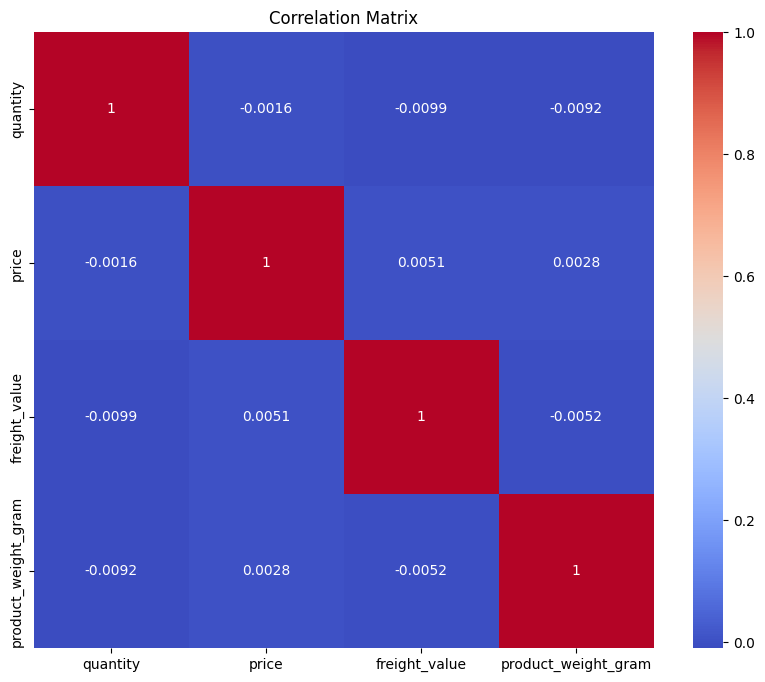

In [132]:
# Select only numeric columns for correlation calculation
numeric_columns = df.select_dtypes(include=[np.number])

# Calculate correlation matrix
correlation_matrix = numeric_columns.corr()

# Print correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Visualize correlation matrix with a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Correlation Matrix Results**

1. **quantity vs. price**: A correlation of -0.001649 indicates almost no relationship between quantity and price.

2. **quantity vs. freight_value**: A correlation of -0.009926 indicates almost no relationship between quantity and freight value.

3. **quantity vs. product_weight_gram**: A correlation of -0.009247 indicates almost no relationship between quantity and product weight in grams.

4. **price vs. freight_value**: A correlation of 0.005095 indicates almost no relationship between price and freight value.

5. **price vs. product_weight_gram**: A correlation of 0.002746 indicates almost no relationship between price and product weight in grams.

6. **freight_value vs. product_weight_gram**: A correlation of -0.005212 indicates almost no relationship between freight value and product weight in grams.

Overall, these correlation values are very close to 0, indicating that the variables in dataset do not have significant linear relationships with each other.

**Correlation Heatmap**


**Most cells are very light blue or almost white, indicating very weak or no correlation between most variables.**

**From the analysis of the correlation matrix and heatmap, it can be concluded that there are no significant linear relationships between the variables quantity, price, freight_value, and product_weight_gram in the dataset. This means that changes in one variable are not consistently related to changes in another variable.**

**5. Visualize Data with Charts and Graphs**

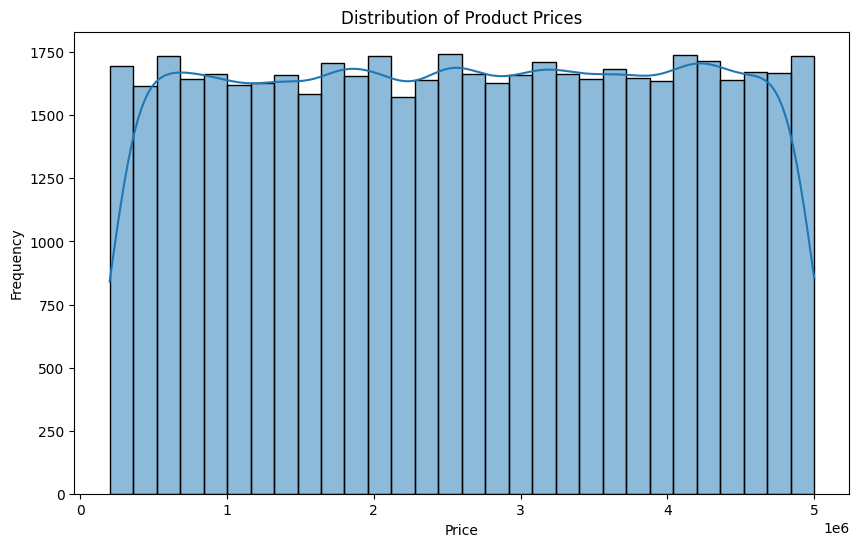

In [133]:
# Product price distribution graph
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Distribution of Product Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

The distribution of product prices from dataset appears to be relatively uniform, with no significant clustering around particular price points. This uniformity suggests that products are priced across a wide range without significant bias towards any specific price range. The slight decline in frequency at the higher end of the price spectrum indicates fewer high-priced products.

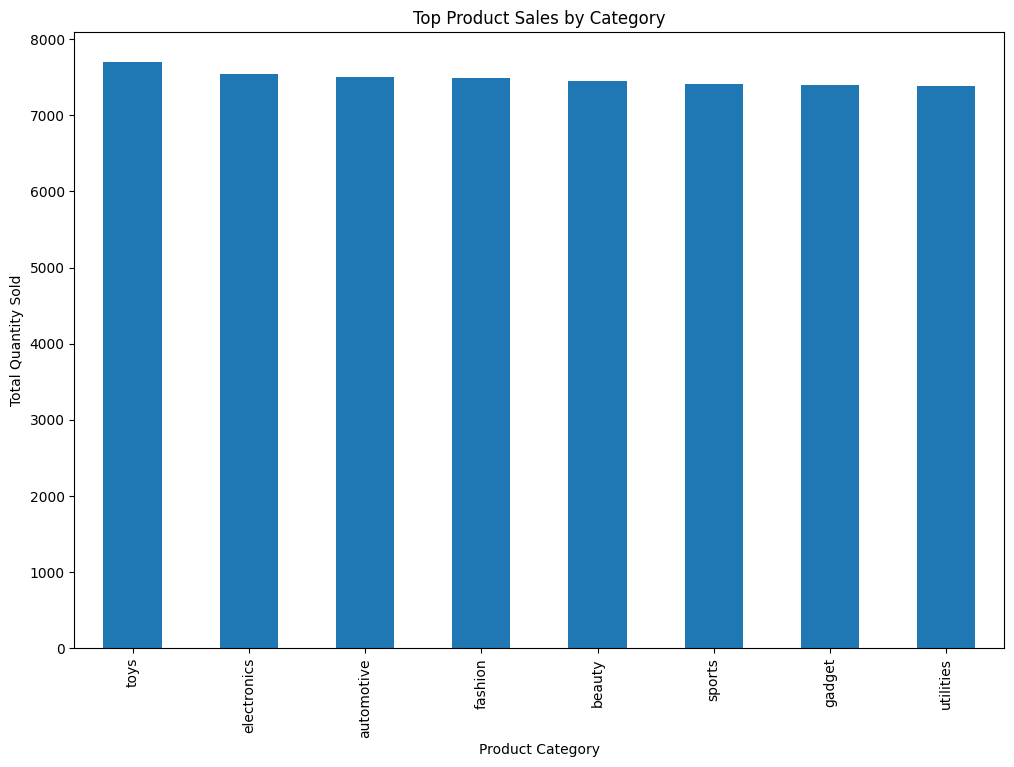

In [134]:
# Product sales graph by category
plt.figure(figsize=(12, 8))
top_product_sales.plot(kind='bar')
plt.title('Top Product Sales by Category')
plt.xlabel('Product Category')
plt.ylabel('Total Quantity Sold')
plt.show()

The bar chart indicates that the company or market has robust sales across various product categories, with "toys" being the top-selling category. The relatively uniform distribution of sales suggests a balanced and diverse product offering, high consumer demand, and effective marketing and distribution strategies. This balanced approach can help the business remain resilient to market fluctuations and consumer preference changes.

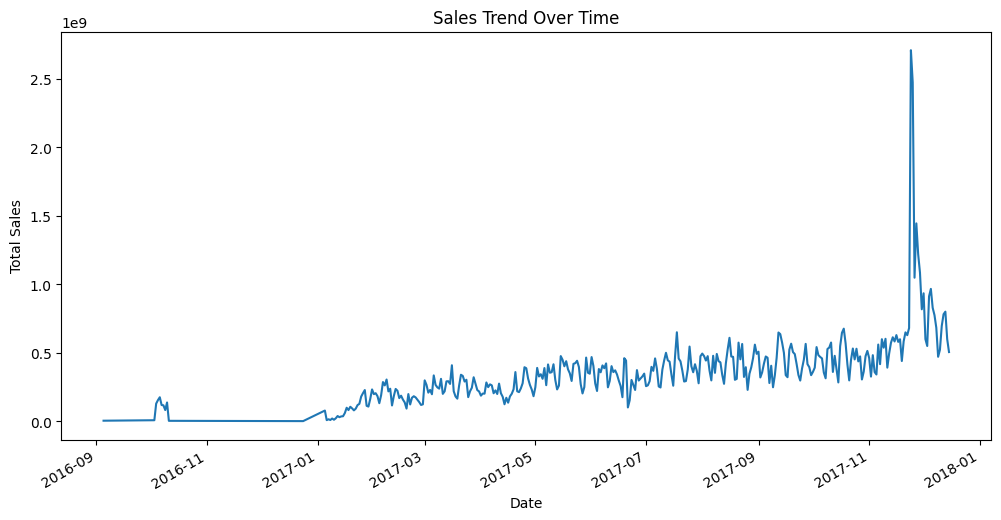

In [151]:
# Purchase trend graph by date
df['purchase_date'] = pd.to_datetime(df['purchase_date'], format='%d/%m/%Y')

# Define the start and end date for the range
start_date = '01/09/2016'
end_date = '31/01/2018'

# Filter the dataframe for the specified date range
filtered_df = df[(df['purchase_date'] >= start_date) & (df['purchase_date'] <= end_date)]
sales_by_date = df.groupby('purchase_date')['price'].sum()

plt.figure(figsize=(12, 6))
sales_by_date.plot()
plt.title('Sales Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.show()

From The Result :

1. **Initial Period (Sep 2016 to mid-2017)**:

- Sales are relatively low and stable with minor fluctuations.

- There are a few noticeable spikes, but overall the trend remains flat.

2. **Middle Period (mid-2017 to Sep 2017)**:

- There is a gradual increase in sales.

- Sales begin to show more frequent spikes, indicating periodic increases in sales volume.

3. **End Period (Oct 2017 to Jan 2018)**:

- A significant spike is observed towards the end of 2017, reaching a peak of nearly 2.5 billion in total sales.

- This sharp increase could be attributed to a seasonal event, promotion, or a new product launch.

- Following the peak, there is a rapid decline, but sales remain higher than in the initial period.

<ipython-input-139-05f86b6bb260>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')


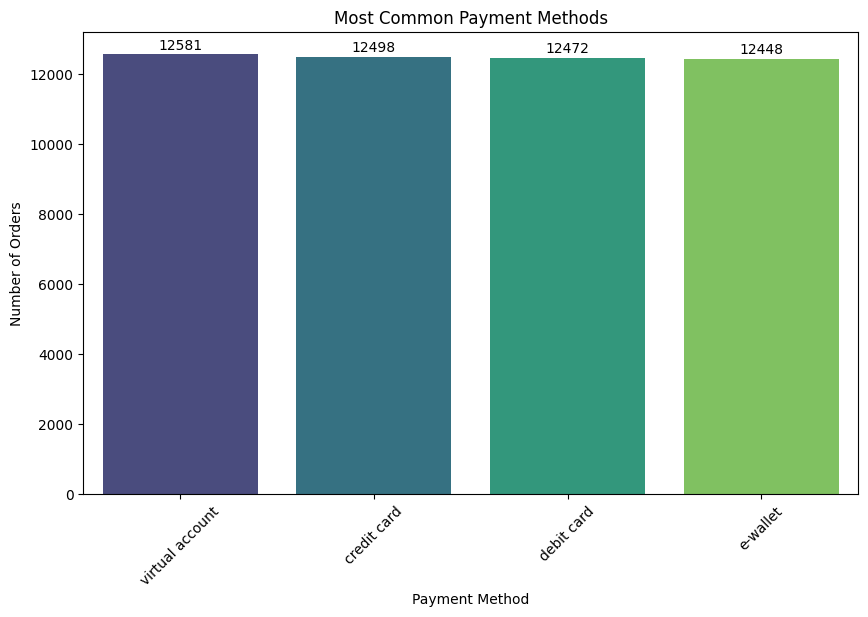

In [139]:
# Count the occurrences of each payment method
payment_method_counts = df['payment_type'].value_counts()

# Plot the most common payment methods
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette='viridis')

# Annotate each bar with the count
for index, value in enumerate(payment_method_counts.values):
    ax.text(index, value + 50, str(value), ha='center', va='bottom')

plt.title('Most Common Payment Methods')
plt.xlabel('Payment Method')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.show()

**Despite these differences, all four payment methods are almost equally popular, each with more than 12,000 orders. This indicates a relatively balanced distribution of payment method preferences among customers, with no single method overwhelmingly preferred over the others. The small differences in counts suggest that customers are comfortable using various payment methods, reflecting diverse preferences or accessibility to different payment options.**

**Overall, this balanced usage of payment methods can be advantageous for businesses as it suggests flexibility in payment processing and accessibility for a broader customer base. Companies might continue to support and promote all these payment methods to cater to their diverse customer preferences.**

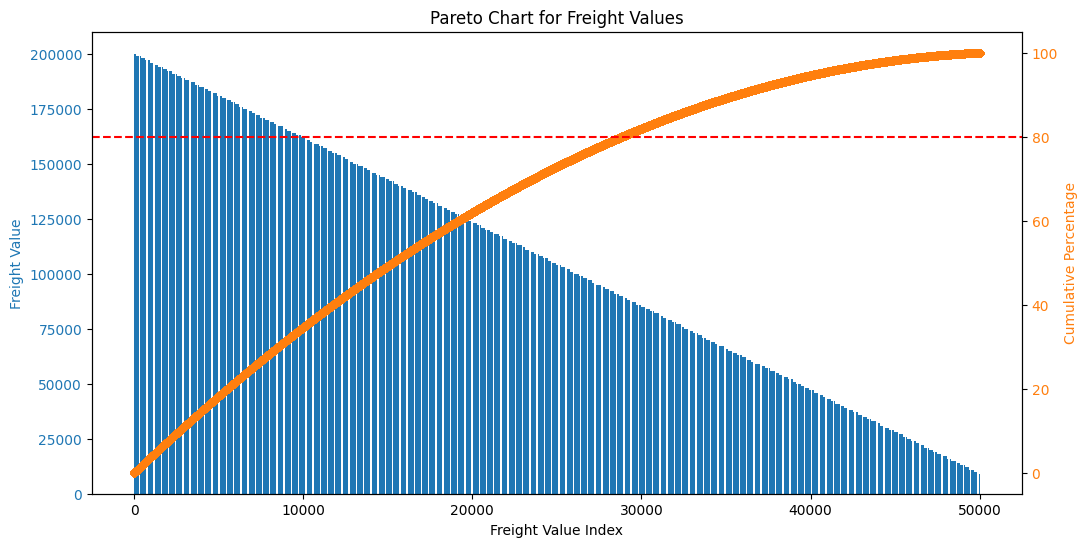

In [141]:
# Sort freight values in descending order
sorted_freight_values = df['freight_value'].sort_values(ascending=False)

# Calculate cumulative percentage
cumulative_percentage = sorted_freight_values.cumsum() / sorted_freight_values.sum() * 100

# Create Pareto chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot for freight values
ax1.bar(range(len(sorted_freight_values)), sorted_freight_values, color='C0')
ax1.set_xlabel('Freight Value Index')
ax1.set_ylabel('Freight Value', color='C0')
ax1.tick_params(axis='y', labelcolor='C0')

# Line plot for cumulative percentage
ax2 = ax1.twinx()
ax2.plot(range(len(cumulative_percentage)), cumulative_percentage, color='C1', marker='D', ms=4)
ax2.set_ylabel('Cumulative Percentage', color='C1')
ax2.tick_params(axis='y', labelcolor='C1')
ax2.axhline(y=80, color='r', linestyle='--')

plt.title('Pareto Chart for Freight Values')
plt.show()

**The bars show that a small number of high freight values contribute significantly to the total freight value.
As the index increases, the individual freight values decrease.**

**The cumulative line shows how the total freight value accumulates as more freight values are added.
The steep initial slope indicates that a small number of high-value freight items contribute a large portion of the total value.**

**The red dashed line intersects the cumulative line around the 10,000 mark on the x-axis.
This indicates that approximately 10,000 of the freight values account for 80% of the total freight value.
Conversely, the remaining 40,000 values contribute to the remaining 20% of the total.**

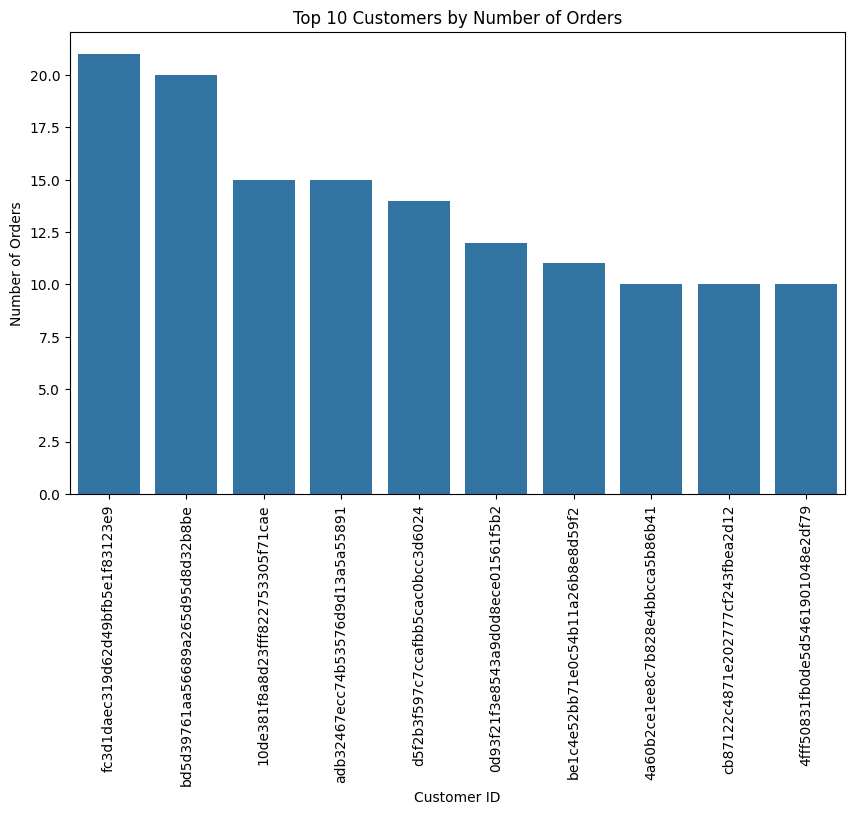

In [143]:
# Plot the top 10 customers by number of orders
top_customers = df['customer_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Customers by Number of Orders')
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.show()


**The customer with the ID fc31d4ecaf391062449b9be5f4b312f9 has placed the highest number of orders, slightly above 20.**

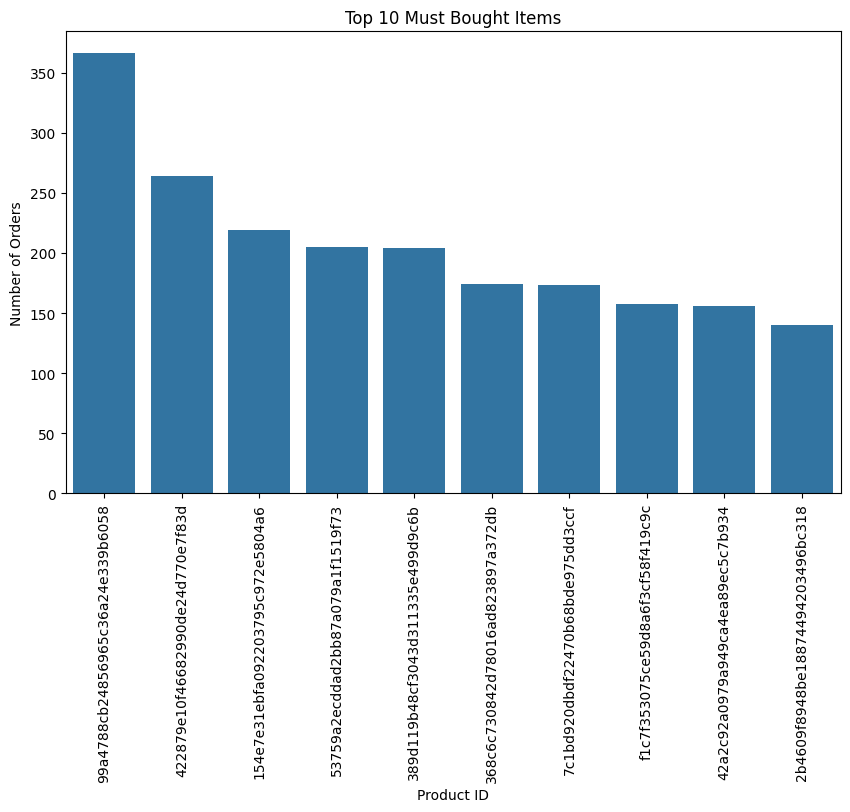

In [144]:
# Plot the top 10 customers by number of orders
top_customers = df['product_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index, y=top_customers.values)
plt.title('Top 10 Must Bought Items')
plt.xlabel('Product ID')
plt.ylabel('Number of Items Boughts')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.show()

**The Items with the ID 99a4788cb24856965c36a24e339b6058 has placed the highest number of Items Boughts, slightly above 350.**

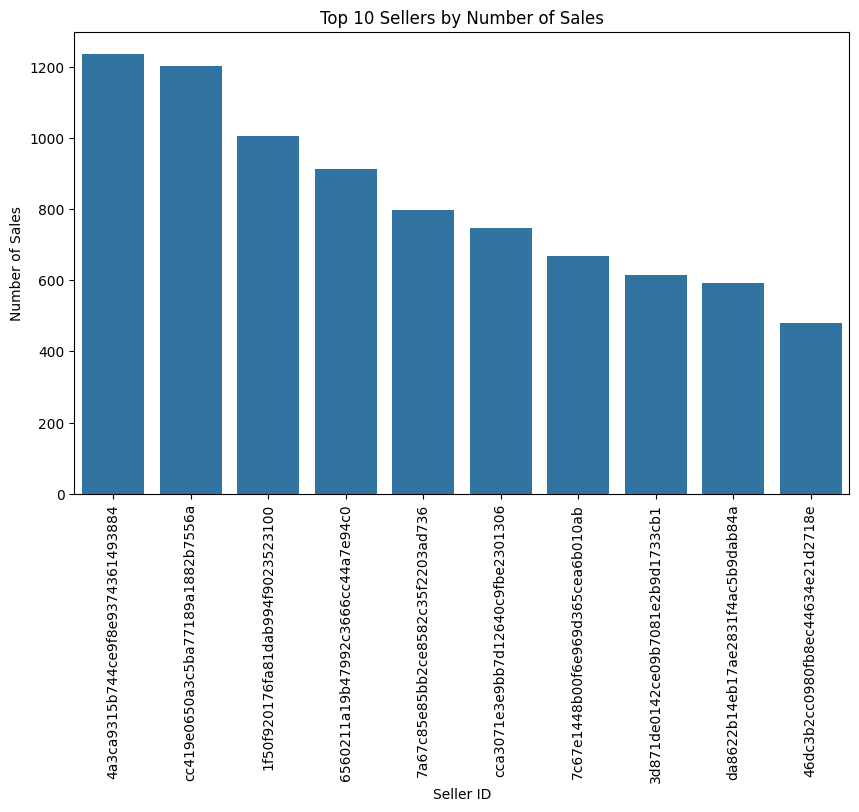

In [145]:
# Plot the top 10 sellers by number of sales
top_sellers = df['seller_id'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_sellers.index, y=top_sellers.values)
plt.title('Top 10 Sellers by Number of Sales')
plt.xlabel('Seller ID')
plt.ylabel('Number of Sales')
# Rotate x-axis labels vertically
plt.xticks(rotation=90)
plt.show()

**The Seller with the ID 4a3ca9315b744ce9f8e9374361493884 has placed the highest number of Sales, slightly above 1200.**

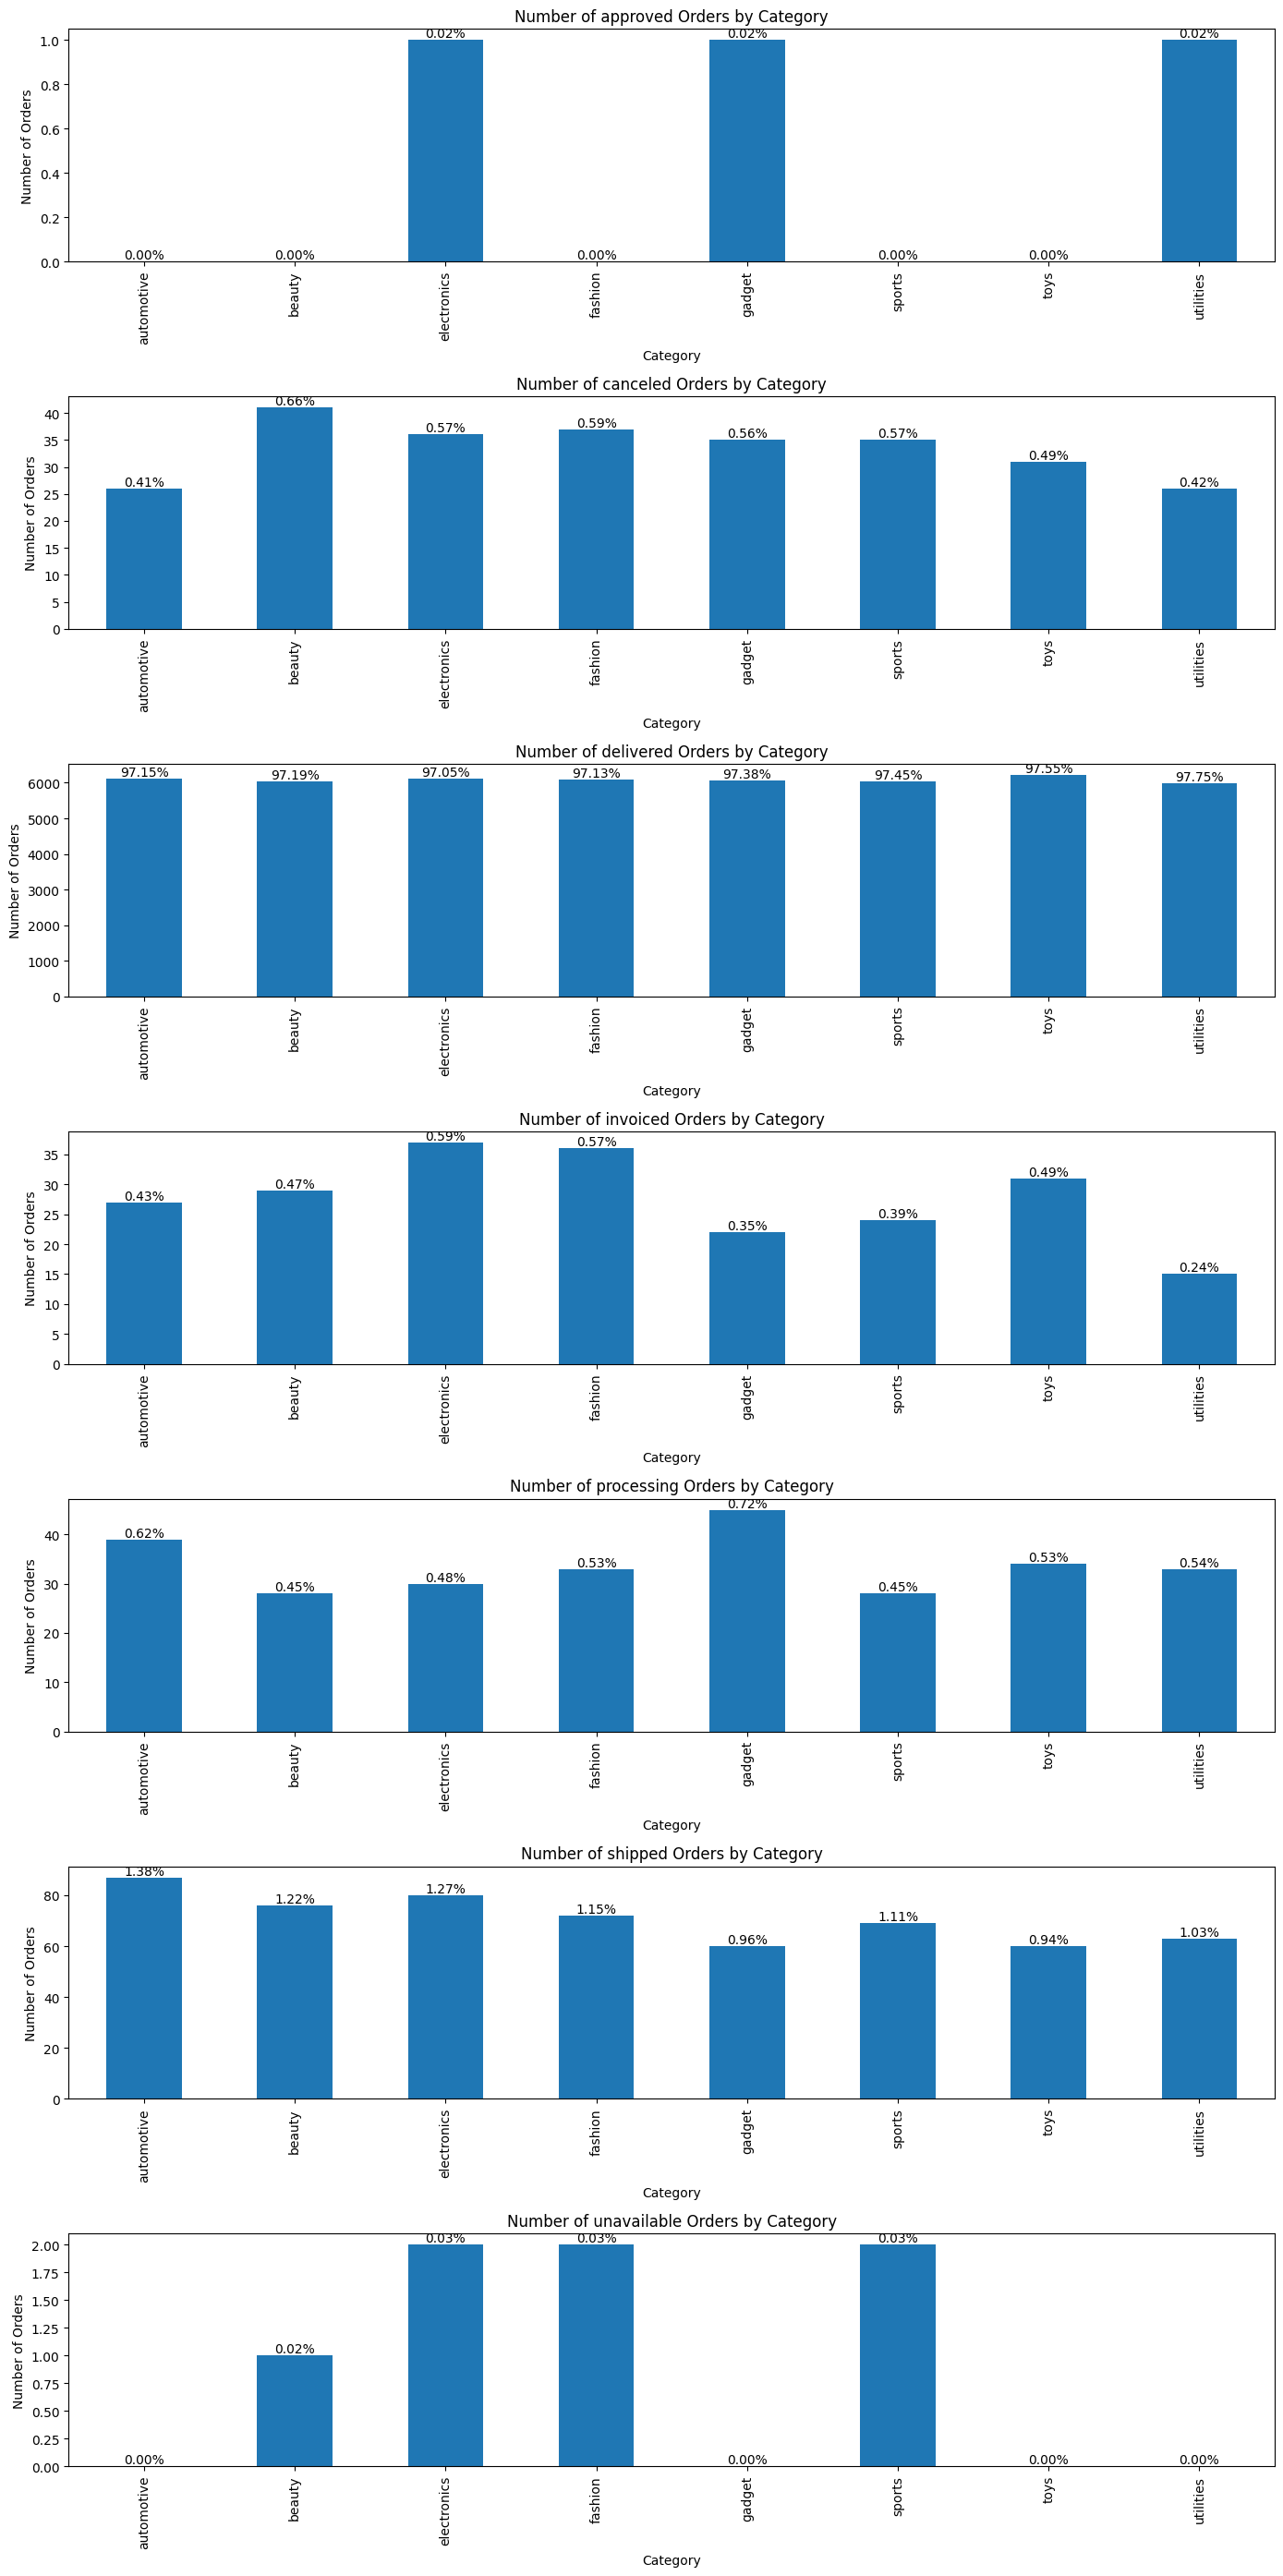

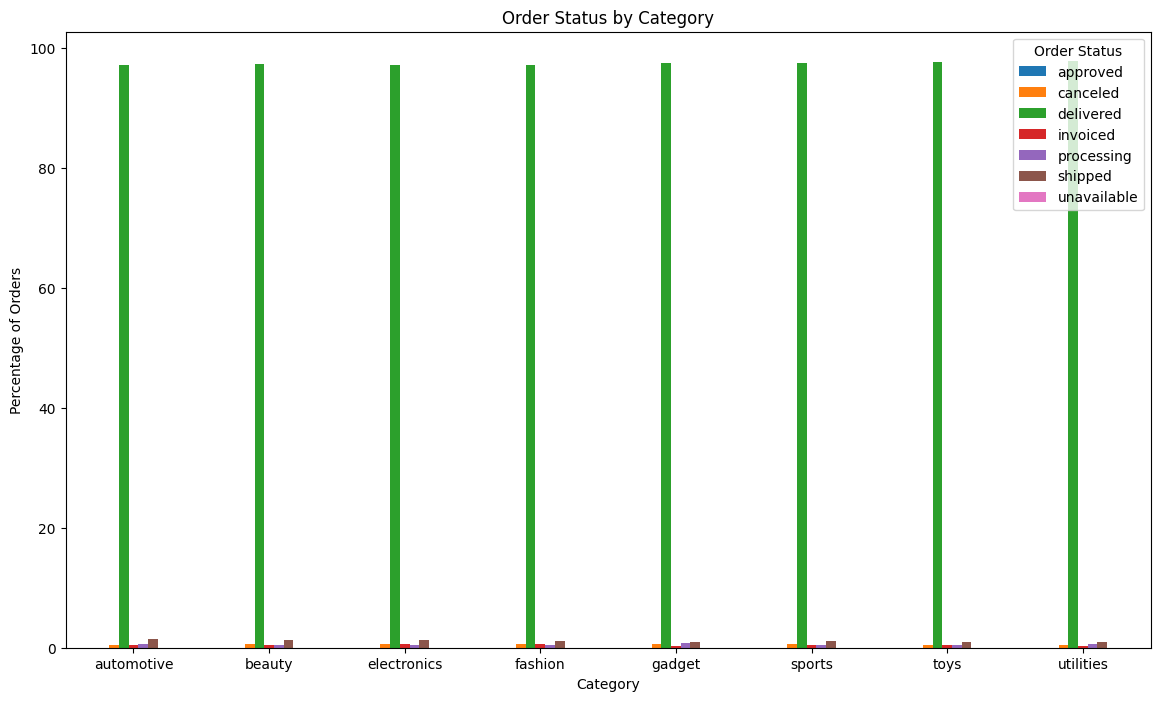

In [154]:
# Group by category and order status
category_status = df.groupby(['product_category_name', 'order_status']).size().unstack(fill_value=0)

# Calculate total for each category
category_total = category_status.sum(axis=1)

# Calculate percentage for each category and status
category_status_percentage = category_status.divide(category_total, axis=0) * 100

# Create separate bar charts for each order status with percentages
order_statuses = category_status.columns

fig, axes = plt.subplots(nrows=len(order_statuses), ncols=1, figsize=(14, len(order_statuses) * 4))

for i, status in enumerate(order_statuses):
    ax = axes[i]
    category_status[status].plot(kind='bar', ax=ax)
    ax.set_title(f'Number of {status} Orders by Category')
    ax.set_xlabel('Category')
    ax.set_ylabel('Number of Orders')

    # Add percentage above each bar
    for index, p in enumerate(ax.patches):
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(f'{category_status_percentage.loc[category_status.index[index], status]:.2f}%',
                    (x, y), ha='center', va='bottom')

plt.tight_layout()
plt.show()

# Alternatively, create a grouped bar chart with percentages
category_status_percentage.plot(kind='bar', figsize=(14, 8))
plt.title('Order Status by Category')
plt.xlabel('Category')
plt.ylabel('Percentage of Orders')
plt.legend(title='Order Status')
plt.xticks(rotation=0)
plt.show()